<a href="https://colab.research.google.com/github/vishaleswari1813-cpu/CSA0710-CN/blob/main/AI-Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive (4).zip to archive (4).zip
Saving archive (9).zip to archive (9).zip
Saving archive (6).zip to archive (6).zip
Saving archive (5).zip to archive (5).zip


In [2]:
import zipfile

for file in uploaded.keys():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall("/content")

print("ZIP files extracted successfully ✅")

ZIP files extracted successfully ✅


In [3]:
import os
print(os.listdir("/content"))

['.config', 'ML Car Diagnostic Agent AI Assistant.csv', 'archive (6).zip', 'dog_behavior_dataset.csv', 'archive (5).zip', 'Head_gesture_data_1IMUsensor_9pers_time.csv', 'multiple_IMU.csv', 'archive (4).zip', 'archive (9).zip', 'sample_data']


In [4]:
import pandas as pd

dog_df = pd.read_csv("/content/dog_behavior_dataset.csv")
gesture_df = pd.read_csv("/content/Head_gesture_data_1IMUsensor_9pers_time.csv")
car_df = pd.read_csv("/content/ML Car Diagnostic Agent AI Assistant.csv")
imu_df = pd.read_csv("/content/multiple_IMU.csv")

# Clean column names
for df in [dog_df, gesture_df, car_df, imu_df]:
    df.columns = df.columns.str.strip().str.lower()

print("Datasets loaded and cleaned ✅")

Datasets loaded and cleaned ✅


In [5]:
def preprocess_dataset(df):
    df = df.copy()

    target = df.columns[-1]   # assume last column is target

    numeric_cols = df.select_dtypes(include=['float64','int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Fill missing
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    df[categorical_cols] = df[categorical_cols].fillna("unknown")

    # Encode categorical
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(target, axis=1)
    y = df[target]

    return X, y, target

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf_acc = accuracy_score(y_test, rf.predict(X_test))

    lr = LogisticRegression(max_iter=2000)
    lr.fit(X_train, y_train)
    lr_acc = accuracy_score(y_test, lr.predict(X_test))

    return rf_acc, lr_acc

In [7]:
results = {}

datasets = {
    "Dog": dog_df,
    "Gesture": gesture_df,
    "Car": car_df,
    "IMU": imu_df
}

for name, df in datasets.items():
    X, y, target = preprocess_dataset(df)
    rf_acc, lr_acc = train_models(X, y)

    results[name] = {
        "Random Forest": rf_acc,
        "Logistic Regression": lr_acc
    }

print(results)

KeyError: "['complex_behavior'] not found in axis"

In [8]:
def preprocess_dataset(df):
    df = df.copy()

    # assume last column is target BEFORE encoding
    target_col = df.columns[-1]

    y = df[target_col]
    X = df.drop(columns=[target_col])

    numeric_cols = X.select_dtypes(include=['float64','int64']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    # Fill missing values
    X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
    X[categorical_cols] = X[categorical_cols].fillna("unknown")

    # Encode only features
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

    return X, y, target_col

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf_acc = accuracy_score(y_test, rf.predict(X_test))

    lr = LogisticRegression(max_iter=2000)
    lr.fit(X_train, y_train)
    lr_acc = accuracy_score(y_test, lr.predict(X_test))

    return rf_acc, lr_acc

In [10]:
results = {}

datasets = {
    "Dog": dog_df,
    "Gesture": gesture_df,
    "Car": car_df,
    "IMU": imu_df
}

for name, df in datasets.items():
    try:
        X, y, target = preprocess_dataset(df)
        rf_acc, lr_acc = train_models(X, y)

        results[name] = {
            "Random Forest": rf_acc,
            "Logistic Regression": lr_acc
        }
    except Exception as e:
        results[name] = f"Error: {e}"

print(results)

{'Dog': "Error: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Abnormal|Abnormal|Abnormal'", 'Gesture': 'Error: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.', 'Car': {'Random Forest': 1.0, 'Logistic Regression': 1.0}, 'IMU': 'Error: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.'}


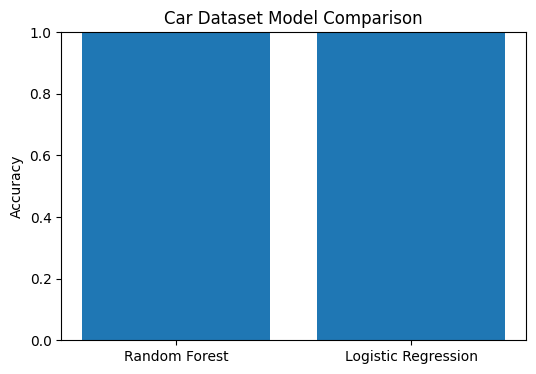

In [11]:
import matplotlib.pyplot as plt

for dataset_name, scores in results.items():
    if isinstance(scores, dict):
        models = list(scores.keys())
        accs = list(scores.values())

        plt.figure(figsize=(6,4))
        plt.bar(models, accs)
        plt.title(f"{dataset_name} Dataset Model Comparison")
        plt.ylabel("Accuracy")
        plt.ylim(0,1)
        plt.show()